In [3]:
#!pip install scipy

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
import numpy as np

In [5]:
archivo_excel = 'data.xlsx'
df = pd.read_excel(archivo_excel)

In [10]:
ventanas = [3, 9, 15, 20]

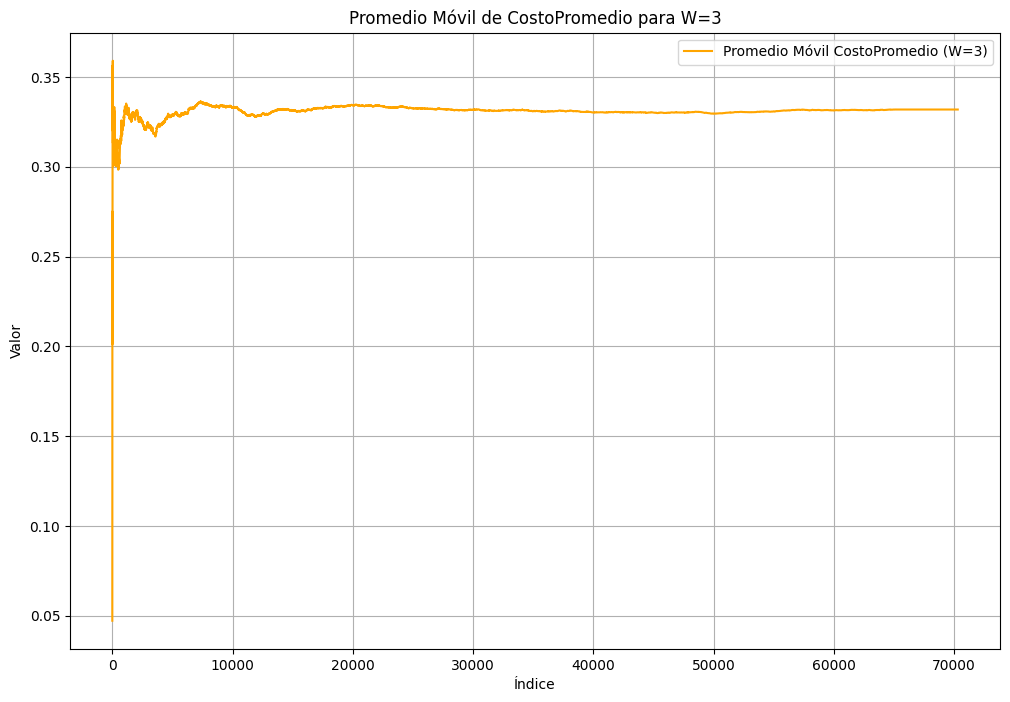

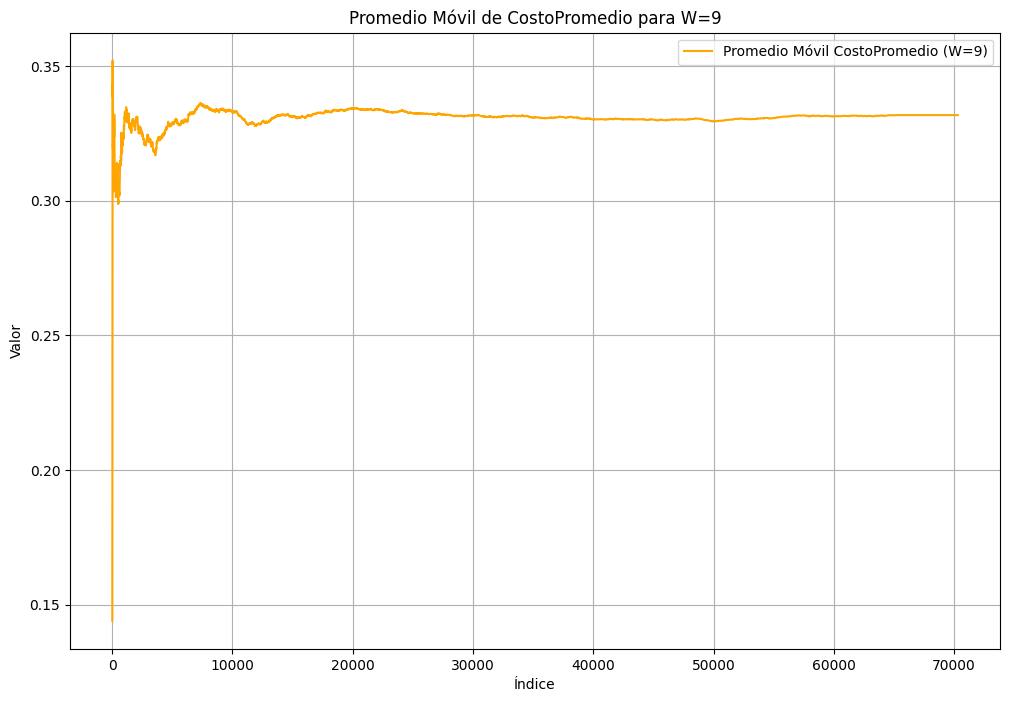

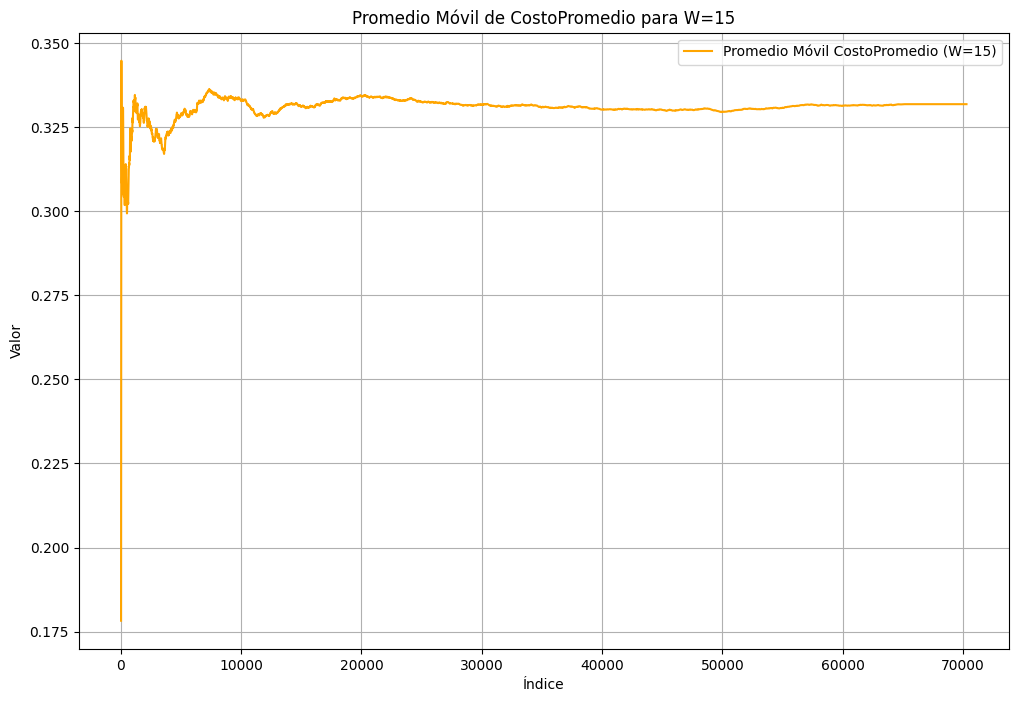

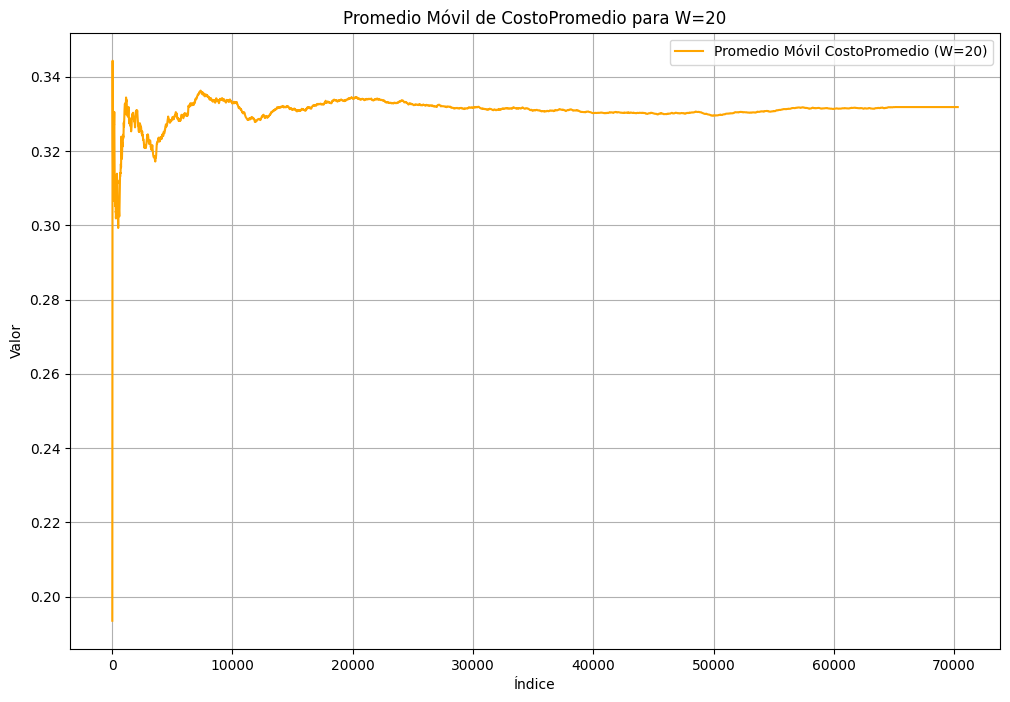

In [11]:
for w in ventanas:
    df[f'Promedio Móvil CostoPromedio W={w}'] = df['CostoPromedio'].rolling(window=w).mean()
    
    plt.figure(figsize=(12, 8))
    plt.plot(df[f'Promedio Móvil CostoPromedio W={w}'], label=f'Promedio Móvil CostoPromedio (W={w})', color='orange')
    plt.title(f'Promedio Móvil de CostoPromedio para W={w}')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

### GENERACION DE EXCEL

### TIEMPO DE COLA 

In [ ]:
#!pip install openpyxl

In [14]:
import openpyxl as px

In [15]:
ruta_archivo = 'data.xlsx'
libro = px.load_workbook(ruta_archivo)
hoja = libro.active

In [16]:
columna_costo_promedio = px.utils.get_column_letter(hoja.max_column)  
ventanas = [3, 9, 15, 20]
columna_inicial = hoja.max_column + 1 

In [17]:
for i, w in enumerate(ventanas, start=columna_inicial):
    letra_columna = px.utils.get_column_letter(i)
    hoja[f'{letra_columna}1'] = f'Promedio Móvil CostoPromedio W={w}'  

    for fila in range(2, hoja.max_row + 1):
        fila_inicio = max(fila - w + 1, 2)
        fila_fin = fila
        hoja[f'{letra_columna}{fila}'] = f'=AVERAGE({columna_costo_promedio}{fila_inicio}:{columna_costo_promedio}{fila_fin})'

ruta_archivo_modificado = 'grafica_welch.xlsx'
libro.save(ruta_archivo_modificado)
ruta_archivo_modificado


'grafica_welch.xlsx'

###
Luego de abrir el excel, se debe eliminar las ultimas columnas dependiendo el valor de la ventana, es decir si W = 3, se debe eliminar las 3 ultimas filas y asi con cada columna de las ventanas, para posteriormente seleccionar toda la columna (incluso los espacios vacios) y realizar la grafica de linea

El archivo "finalon.xlsx", se encuentra la ejemplificacion de lo comentado anteriormente

### TIEMPO DE OCIOSO

In [26]:
ruta_archivo_nuevo = 'tiempo_ocioso/Welch_TiempoOscio_Aplica_Welch.xlsx'
libro_nuevo = px.load_workbook(ruta_archivo_nuevo)
hoja_nueva = libro_nuevo.active

In [27]:
columna_costo_promedio_nuevo = px.utils.get_column_letter(hoja_nueva.max_column) 
ventanas_nuevas = [3, 9, 15, 20]
columna_inicial_nueva = hoja_nueva.max_column + 1

In [28]:
for i, w in enumerate(ventanas_nuevas, start=columna_inicial_nueva):
    letra_columna_nueva = px.utils.get_column_letter(i)
    hoja_nueva[f'{letra_columna_nueva}1'] = f'Promedio Móvil CostoPromedio W={w}' 

    for fila in range(2, hoja_nueva.max_row + 1):
        fila_inicio = max(fila - w + 1, 2)
        fila_fin = fila
        hoja_nueva[f'{letra_columna_nueva}{fila}'] = f'=AVERAGE({columna_costo_promedio_nuevo}{fila_inicio}:{columna_costo_promedio_nuevo}{fila_fin})'



In [29]:
ruta_archivo_modificado_nuevo = 'tiempo_ocioso/Welch_ocioso.xlsx'
libro_nuevo.save(ruta_archivo_modificado_nuevo)
ruta_archivo_modificado_nuevo

'tiempo_ocioso/Welch_ocioso.xlsx'